In [1]:
import numpy as np
import matplotlib.pyplot as plt

## White Noise Estimation with AR(1)

In [2]:
fs = 256                 # sampling frequency (Hz)
N = 512                  # fs = N*fp (N must be a natural number)
fp = fs/N                # prediction frequency
n_i = 1                  # AR order
t_s = 1/fs               # Input signal time period
n_samples = 10241        # Length of input sequence

print(f'Input length: {n_samples}')
print(f'Model: AR({n_i})')
print(f'Window width: {N}')
print(f'Sampling frequency: {fs} Hz')
print(f'Prediction frequency: {fp} Hz')

Input length: 10241
Model: AR(1)
Window width: 512
Sampling frequency: 256 Hz
Prediction frequency: 0.5 Hz


In [3]:
np.random.seed(42)
                                               
e = np.sqrt(1.0) * np.random.randn(n_samples)  # Generate white noise input sequence
a = 1.8 * np.random.randn(n_i) - 0.9           # Initialise AR coefficients
Ik = N

ar_index_list = []
ar_hats_list = []
for t in range(Ik + n_i, n_samples):           # Moving window starting from index 1 to (n_samples-1)
    ar_index_list.append(t)
    
    window_start = t - Ik - n_i + 1
    window_end = t                             # Assume window_end is present time
    x_t = e[window_start:window_end]           # Select input sequence in window
    N_window = len(x_t)                        # Window size
    ymat = np.zeros((N_window-n_i, n_i))
    yb = np.zeros((N_window-n_i, n_i))
    ymat[:, 0] = x_t[0:-1]
    yb = x_t[n_i:]
    arhat_window = np.linalg.pinv(ymat) @ yb
    ar_hats_list.append(arhat_window)
    
ar_index = np.array(ar_index_list)
ar_hats = np.array(ar_hats_list)
print('Output dim:', ar_index.shape)

Output dim: (9728,)


In [4]:
y_hat = np.zeros(len(ar_index))
for i in range(n_i, len(ar_index)):
    y_hat[i] = e[i]
    for j in range(n_i):
        y_hat[i] = y_hat[i] + ar_hats[i,j].reshape(-1,1) * y_hat[i-1]

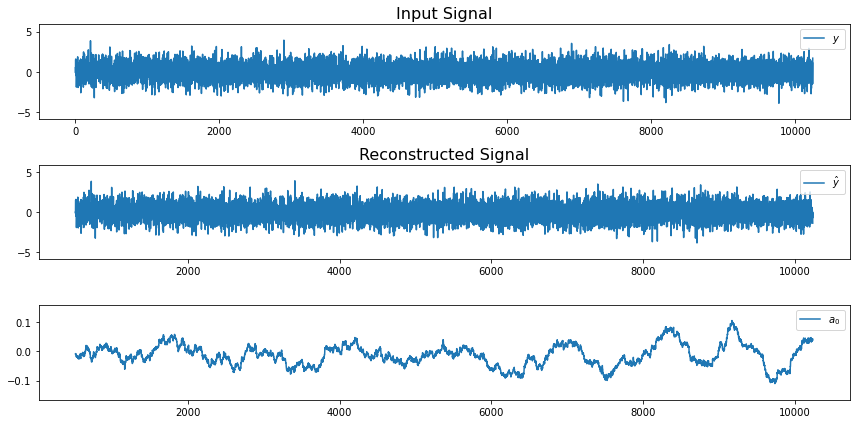

In [5]:
fig, axes = plt.subplots(figsize=(12,6), nrows=3)
axes[0].plot(np.arange(0, n_samples), e, label=r'$y$')
axes[0].set_ylim([e.min()*1.5, e.max()*1.5])
axes[0].legend(loc=1)
axes[0].set_title('Input Signal', fontsize=16) # input signal

axes[1].plot(ar_index, y_hat, label=r'$\hat{y}$')
axes[1].set_ylim([e.min()*1.5, e.max()*1.5])
axes[1].legend(loc=1)
axes[1].set_title('Reconstructed Signal', fontsize=16)

axes[2].plot(ar_index, ar_hats[:,0], label=r'$a_0$') # AR parameters varying
# axes[2].plot(ar_index, ar_hats[:,1], label=r'$a_1$') # AR parameters varying
axes[2].set_ylim([ar_hats.min(axis=0).min()*1.5, ar_hats.max(axis=0).max()*1.5])
axes[2].legend(loc=1)


plt.tight_layout()
plt.show()

## White Noise Estimation with AR(2)

In [6]:
fs = 256                 # sampling frequency (Hz)
N = 512                  # fs = N*fp (N must be a natural number)
fp = fs/N                # prediction frequency
n_i = 2                  # AR order
t_s = 1/fs               # Input signal time period
n_samples = 10241        # Length of input sequence

print(f'Input length: {n_samples}')
print(f'Model: AR({n_i})')
print(f'Window width: {N}')
print(f'Sampling frequency: {fs} Hz')
print(f'Prediction frequency: {fp} Hz')

Input length: 10241
Model: AR(2)
Window width: 512
Sampling frequency: 256 Hz
Prediction frequency: 0.5 Hz


In [7]:
np.random.seed(42)
                                               
e = np.sqrt(1.0) * np.random.randn(n_samples)  # Generate white noise input sequence
a = 1.8 * np.random.randn(n_i) - 0.9           # Initialise AR coefficients
Ik = N

ar_index_list = []
ar_hats_list = []
for t in range(Ik + n_i, n_samples):           # Moving window starting from index 1 to (n_samples-1)
    ar_index_list.append(t)
    
    window_start = t - Ik - n_i + 1
    window_end = t                             # Assume window_end is present time
    x_t = e[window_start:window_end]           # Select input sequence in window
    N_window = len(x_t)                        # Window size
    ymat = np.zeros((N_window-n_i, n_i))
    yb = np.zeros((N_window-n_i, n_i))
    for c in range(n_i, 0, -1):
        ymat[:, n_i-c] = x_t[n_i-c:-c]
    yb = x_t[n_i:]
    arhat_window = np.linalg.pinv(ymat) @ yb
    ar_hats_list.append(arhat_window)
        
    
ar_index = np.array(ar_index_list)
ar_hats = np.array(ar_hats_list)
print('ar_index dim:', ar_index.shape)
print('ar_hats dim:', ar_hats.shape)

ar_index dim: (9727,)
ar_hats dim: (9727, 2)


In [8]:
y_hat = np.zeros(len(ar_index))
for i in range(n_i, len(ar_index)):
    y_hat[i] = e[i]
    for j in range(n_i):
        y_hat[i] = y_hat[i] + ar_hats[i,j].reshape(-1,1) * y_hat[i-1]

In [9]:
import seaborn as sns

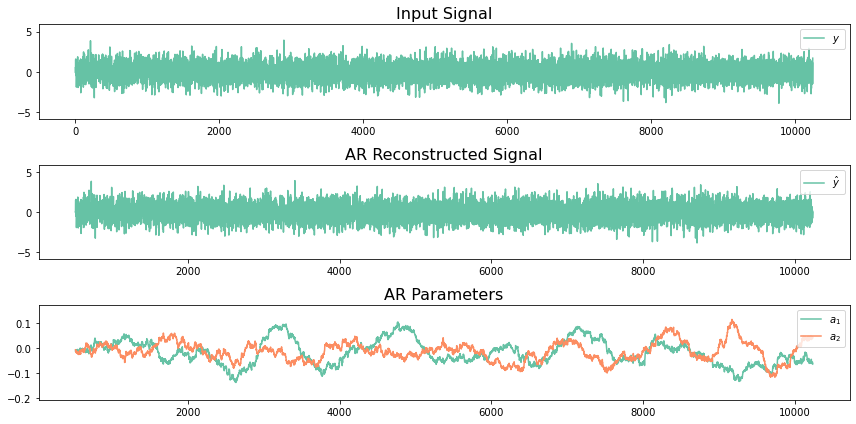

In [12]:
# palette = sns.color_palette('Set2')
sns.set_palette("Set2")
fig, axes = plt.subplots(figsize=(12,6), nrows=3)
ax1 = sns.lineplot(x=np.arange(0, n_samples), y=e, label=r'$y$', ax=axes[0])
ax1.set_ylim([e.min()*1.5, e.max()*1.5])
ax1.legend(loc=1)
ax1.set_title('Input Signal', fontsize=16) # input signal

ax2 = sns.lineplot(x=ar_index, y=y_hat, label=r'$\hat{y}$', ax=axes[1])
ax2.set_ylim([e.min()*1.5, e.max()*1.5])
ax2.legend(loc=1)
ax2.set_title('AR Reconstructed Signal', fontsize=16)


sns.lineplot(x=ar_index, y=ar_hats[:,0], label=r'$a_1$', ax=axes[2]) # AR parameters varying
ax3 = sns.lineplot(x=ar_index, y=ar_hats[:,1], label=r'$a_2$', ax=axes[2])
ax3.set_ylim([ar_hats.min(axis=0).min()*1.5, ar_hats.max(axis=0).max()*1.5])
ax3.legend(loc=1)
ax3.set_title('AR Parameters', fontsize=16)


plt.tight_layout()
plt.savefig('../evaluation/figures/AR2_online_syn.pdf')
plt.show()

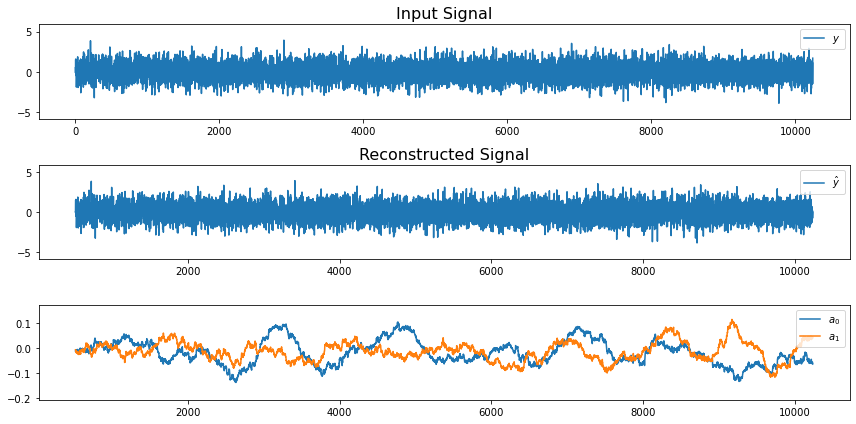

In [12]:
fig, axes = plt.subplots(figsize=(12,6), nrows=3)
axes[0].plot(np.arange(0, n_samples), e, label=r'$y$')
axes[0].set_ylim([e.min()*1.5, e.max()*1.5])
axes[0].legend(loc=1)
axes[0].set_title('Input Signal', fontsize=16) # input signal

axes[1].plot(ar_index, y_hat, label=r'$\hat{y}$')
axes[1].set_ylim([e.min()*1.5, e.max()*1.5])
axes[1].legend(loc=1)
axes[1].set_title('Reconstructed Signal', fontsize=16)

axes[2].plot(ar_index, ar_hats[:,0], label=r'$a_0$') # AR parameters varying
axes[2].plot(ar_index, ar_hats[:,1], label=r'$a_1$') # AR parameters varying
axes[2].set_ylim([ar_hats.min(axis=0).min()*1.5, ar_hats.max(axis=0).max()*1.5])
axes[2].legend(loc=1)


plt.tight_layout()
plt.show()

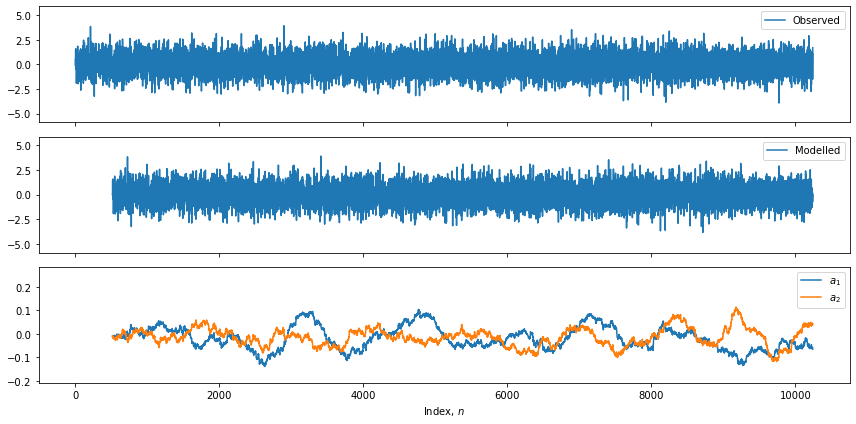

In [20]:
# custom plot for thesis
fig, axes = plt.subplots(figsize=(12,6), nrows=3, sharex=True)
axes[0].plot(np.arange(0, n_samples), e, label='Observed')
axes[0].set_ylim([e.min()*1.5, e.max()*1.5])
axes[0].legend(loc=1)
# axes[0].set_title('Input Signal', fontsize=16) # input signal

axes[1].plot(ar_index, y_hat, label='Modelled')
axes[1].set_ylim([e.min()*1.5, e.max()*1.5])
axes[1].legend(loc=1)
# axes[1].set_title('Reconstructed Signal', fontsize=16)

axes[2].plot(ar_index, ar_hats[:,0], label=r'$a_1$') # AR parameters varying
axes[2].plot(ar_index, ar_hats[:,1], label=r'$a_2$') # AR parameters varying
axes[2].set_ylim([ar_hats.min(axis=0).min()*1.5, ar_hats.max(axis=0).max()*2.5])
axes[2].set_xlabel('Index, $n$')
axes[2].legend(loc=1)

plt.tight_layout()
plt.savefig('../figures/autoregression/AR2_online_syn.pdf')
plt.show()

## White Noise Estimation with AR(n)

In [14]:
fs = 256                 # sampling frequency (Hz)
N = 512                  # fs = N*fp (N must be a natural number)
fp = fs/N                # prediction frequency
n_i = 6                  # AR order
t_s = 1/fs               # Input signal time period
n_samples = 10241        # Length of input sequence

print(f'Input length: {n_samples}')
print(f'Model: AR({n_i})')
print(f'Window width: {N}')
print(f'Sampling frequency: {fs} Hz')
print(f'Prediction frequency: {fp} Hz')

Input length: 10241
Model: AR(6)
Window width: 512
Sampling frequency: 256 Hz
Prediction frequency: 0.5 Hz


In [16]:
%%time
np.random.seed(42)
                                               
e = np.sqrt(1.0) * np.random.randn(n_samples)  # Generate white noise input sequence
a = 1.8 * np.random.randn(n_i) - 0.9           # Initialise AR coefficients
Ik = N

ar_index_list = []
ar_hats_list = []
for t in range(Ik + n_i, n_samples):           # Moving window starting from index 1 to (n_samples-1)
    ar_index_list.append(t)
    
    window_start = t - Ik - n_i + 1
    window_end = t                             # Assume window_end is present time
    x_t = e[window_start:window_end]           # Select input sequence in window
    N_window = len(x_t)                        # Window size
    ymat = np.zeros((N_window-n_i, n_i))
    yb = np.zeros((N_window-n_i, n_i))
    for c in range(n_i, 0, -1):
        ymat[:, n_i-c] = x_t[n_i-c:-c]
    yb = x_t[n_i:]
    arhat_window = np.linalg.pinv(ymat) @ yb
    ar_hats_list.append(arhat_window)
        
    
ar_index = np.array(ar_index_list)
ar_hats = np.array(ar_hats_list)
print('ar_index dim:', ar_index.shape)
print('ar_hats dim:', ar_hats.shape)

ar_index dim: (9723,)
ar_hats dim: (9723, 6)
CPU times: user 5.75 s, sys: 231 ms, total: 5.98 s
Wall time: 5.91 s


In [18]:
%%time
y_hat = np.zeros(len(ar_index))
for i in range(n_i, len(ar_index)):
    y_hat[i] = e[i]
    for j in range(n_i):
        y_hat[i] = y_hat[i] + ar_hats[i,j].reshape(-1,1) * y_hat[i-1]

CPU times: user 346 ms, sys: 7.47 ms, total: 354 ms
Wall time: 394 ms


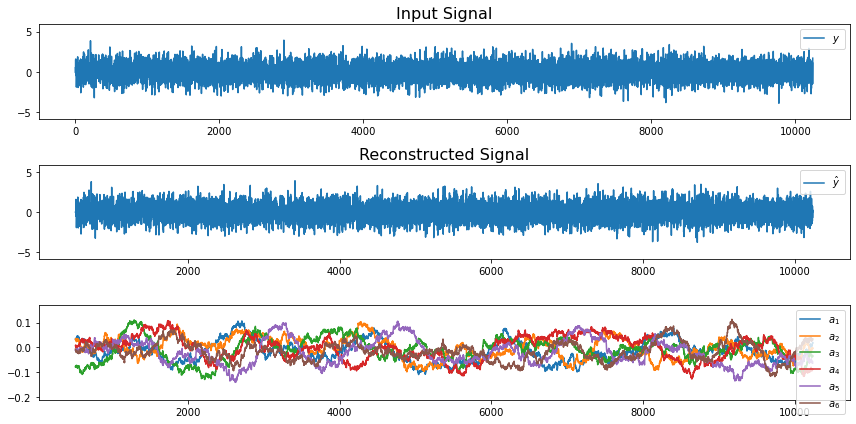

In [19]:
fig, axes = plt.subplots(figsize=(12,6), nrows=3)
axes[0].plot(np.arange(0, n_samples), e, label=r'$y$')
axes[0].set_ylim([e.min()*1.5, e.max()*1.5])
axes[0].legend(loc=1)
axes[0].set_title('Input Signal', fontsize=16) # input signal

axes[1].plot(ar_index, y_hat, label=r'$\hat{y}$')
axes[1].set_ylim([e.min()*1.5, e.max()*1.5])
axes[1].legend(loc=1)
axes[1].set_title('Reconstructed Signal', fontsize=16)

for i in range(n_i):
    axes[2].plot(ar_index, ar_hats[:,i], label=f'$a_{i+1}$') # AR parameters varying
axes[2].set_ylim([ar_hats.min(axis=0).min()*1.5, ar_hats.max(axis=0).max()*1.5])
axes[2].legend(loc=1)


plt.tight_layout()
plt.show()